In [1]:
#Imports
# -*- coding: utf-8 -*-

import pandas as pd
import csv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import statistics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#Cargamos dataset
dataML = pd.read_csv('../TFM/Machine_Learning_Data/datos_ML_split.csv',sep=';',engine='python')
dataML.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [3]:
#Tipo de Datos
dataML = dataML.astype(np.int32)
dataML.dtypes

year       int32
month      int32
day        int32
hours      int32
minutes    int32
seconds    int32
dias       int32
id         int32
estado     int32
dtype: object

In [4]:
#Comprobamos Filas Totales
counter = dataML.shape[0]
print('Filas: ',counter)

Filas:  11899959


In [5]:
#Comprobamos filas iniciales
dataML.head(3)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139


In [6]:
#Comprobamos filas finales
dataML.tail(3)

,year,month,day,hours,minutes,seconds,dias,id,estado
11899956,2015,12,31,23,0,2,4,2095,47
11899957,2015,12,31,23,0,2,4,2097,44
11899958,2015,12,31,23,0,2,4,2098,38


In [7]:
#Datos Estadísticos
dataML['estado'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
estado,11899959.0,809.628208,1093.308683,1.0,98.0,346.0,1059.0,17982.0


In [53]:
#Tramos con mayor incidencia de tráfico
df_mean_tramo = dataML.groupby(['id']).estado.mean().to_frame().reset_index()
df_mean_tramo = df_mean_tramo.nlargest(10, ['estado']) 
df_mean_tramo

,id,estado
355,10373,4279.274944
67,1072,3938.501210
245,10193,3476.310089
375,10406,3466.739141
373,10398,3236.085731
75,1082,3112.172468
0,101,3111.339444
223,10170,3076.439860
31,1029,2947.372401
311,10271,2920.151291


# Métodos Machine Learning

### 1.- Linear Regression

In [33]:
#importamos paquete Linear Regression desde sklearn
from sklearn.linear_model import LinearRegression

In [34]:
#Copiamos dataset
dataLR = dataML.copy()

dataLR = dataLR.astype(np.int32)
dataLR.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [35]:
dataLR.dtypes

year       int32
month      int32
day        int32
hours      int32
minutes    int32
seconds    int32
dias       int32
id         int32
estado     int32
dtype: object

In [36]:
dataLR.count()

year       11899959
month      11899959
day        11899959
hours      11899959
minutes    11899959
seconds    11899959
dias       11899959
id         11899959
estado     11899959
dtype: int64

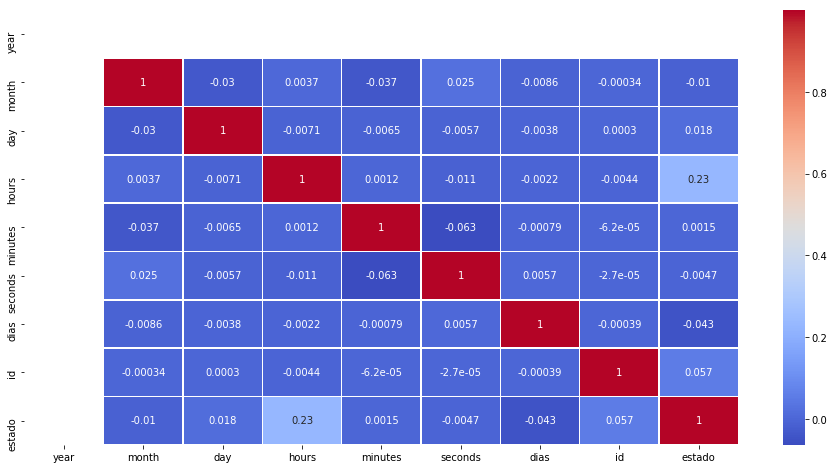

In [37]:
#Correlación de las variables con respecto a estado
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=dataLR.astype({'estado': 'int32'}).corr(),annot=True,vmax=1.0, cmap='coolwarm',\
            linewidths=.5, ax=ax);

In [38]:
#Selección variables independientes y dependientes
X = dataLR[['year','month','day','hours','minutes','seconds','dias','id']] # Features 
y = dataLR['estado'] # Target variable

In [39]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
print('Entrenamiento: ',X_train.shape[0])
print('Test:          ',X_test.shape[0])

Entrenamiento:  8924969
Test:           2974990


In [41]:
#Definición Modelo
linear = LinearRegression()  
modelo_LR = linear.fit(X_train, y_train) 

In [42]:
#Predictions
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

y_pred = modelo_LR.predict(X_test) 

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  15:14:00
Finish:  15:14:00


In [43]:
df_predLiR_section = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred.astype(int)})
df_predLiR_section.head(5)

,Actual,Predicción
6882520,3530,1079
10611524,140,1068
5007573,3243,821
1553010,968,1082
9606822,70,654


In [44]:
#Precisión del Modelo con R2 valores entre 0 y 1. Más cerca de 1 mejor se adapta el modelo
print("Accuracy Linear Regression: ", round(linear.score(X_test, y_test)*100,3))

Accuracy Linear Regression:  5.832


In [45]:
#RMSE
print('RMSE Linear Regression: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE Linear Regression:  1060.522


### 2.- KNN

In [46]:
#importamos paquete KNN desde sklearn
from sklearn.neighbors import KNeighborsClassifier

In [47]:
dataKNN = dataML.copy()

dataKNN = dataKNN.astype(np.int32)
dataKNN.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [48]:
dataKNN.count()

year       11899959
month      11899959
day        11899959
hours      11899959
minutes    11899959
seconds    11899959
dias       11899959
id         11899959
estado     11899959
dtype: int64

In [49]:
#Selección variables independientes y dependientes
X = dataKNN[['year','month','day','hours','minutes','seconds','dias','id']] # Features 
y = dataKNN['estado'] # Target variable

In [50]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [51]:
#Definición Número de vecinos a incluir en el modelo
knn = KNeighborsClassifier(n_neighbors=2)

#Entrenamiento del modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

#Prediction
y_pred = knn.predict(X_test)

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  15:29:05
Finish:  15:34:47


In [55]:
df_predKNN = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
df_predKNN.head(5)

,Actual,Predicción
6882520,3530,1775
10611524,140,140
5007573,3243,2868
1553010,968,919
9606822,70,7


In [56]:
#Precisión del Modelo 
print("Accuracy KNN: ", round(knn.score(X_test, y_test)*100,3))

Accuracy KNN:  6.734


In [57]:
#RMSE
print('RMSE KNN: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE KNN:  709.493


### 3.- Random Forest

In [193]:
#importamos paquete Random Forest desde sklearn
from sklearn.ensemble import RandomForestClassifier

Por falta memoria en el ordenador dividimos el dataset en varias partes para ejecutar este algoritmo
y posteriormente extraemos la media de RMSE

In [214]:
#Primer set
#con un millón de filas tarda aproximadamente 2h:30 min
dataRF = dataML.iloc[0:500000,:].copy()

dataRF.head(5)

,timestamp,dias,id,estado
0,1420071301,4,10102,37
1,1420071301,4,10104,33
2,1420071301,4,10124,139
3,1420071301,4,10127,187
4,1420071301,4,10122,218


In [215]:
dataRF = dataRF.astype(np.int32)
dataRF.dtypes
#dataRF.count()

timestamp    int32
dias         int32
id           int32
estado       int32
dtype: object

In [216]:
#Selección variables independientes y dependientes
X = dataRF[['timestamp','dias','id']] # Features 
y = dataRF['estado'] # Target variable

In [217]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [218]:
# Instantiate model 
rf = RandomForestClassifier(n_estimators=100,max_depth=1,bootstrap=True,verbose=2,max_features = 'sqrt')

# Train the model on training data
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.3s finished


RandomForestClassifier(max_depth=1, max_features='sqrt', verbose=2)

In [219]:
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

#predictions
y_pred=rf.predict(X_test)

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  11:36:44


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 186.9min finished


Finish:  14:45:06


In [220]:
df_predRF = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
df_predRF.head(5)

,Actual,Predicción
194257,1302,4
396319,255,4
138738,308,4
66570,298,4
149424,111,4


In [221]:
acc_random = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy RF: ',round(acc_random,3))

Accuracy RF:  0.953


In [222]:
#RMSE RF
rmse = []

RMSE_1 = metrics.mean_squared_error(y_test, y_pred)
print('RMSE RF: ',round(RMSE_1,3))


rmse.append(RMSE_1)

RMSE RF:  1799707.012


In [108]:
#Media Total RMSE de cada partición
print(rmse)

[1681073.6452444445]


### 4.- Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
dataRFr = dataML.copy()
dataRFr = dataRFr.astype(np.int32)

dataRFr.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [78]:
#Selección variables independientes y dependientes
X = dataRFr[['year','month','day','hours','minutes','seconds','dias','id']] # Features 
y = dataRFr['estado'] # Target variable

In [79]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [80]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=8,bootstrap=True,verbose=2,\
                            max_features = 'auto',random_state = 42)

# Train the model on training data
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 34.5min finished


RandomForestRegressor(max_depth=8, random_state=42, verbose=2)

In [81]:
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

#predictions
y_pred=rfr.predict(X_test)

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  16:50:26


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Finish:  16:50:39


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.8s finished


In [82]:
#RMSE
print('RMSE RANDOM FOREST: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE RANDOM FOREST:  815.851


### 5.- Naive Bayes

In [8]:
#Import Naive Bayes 
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB

In [21]:
#dataNB = dataML.copy()
#dataNB = dataML.iloc[0:200000,:].copy()
#dataNB = dataML.iloc[0:2000000,:].copy()
#dataNB = dataML.iloc[2000001:4000000,:].copy()
#dataNB = dataML.iloc[4000001:6000000,:].copy()
#dataNB = dataML.iloc[6000001:8000000,:].copy()
#dataNB = dataML.iloc[8000001:10000000,:].copy()
dataNB = dataML.iloc[10000001:11899959,:].copy()
dataNB = dataNB.astype(np.int32)
dataNB.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
10000001,2015,11,8,13,0,1,7,10111,1104
10000002,2015,11,8,13,0,1,7,10112,720
10000003,2015,11,8,13,0,1,7,10113,255
10000004,2015,11,8,13,0,1,7,10114,633
10000005,2015,11,8,13,0,1,7,10115,178


In [22]:
dataNB.dtypes

year       int32
month      int32
day        int32
hours      int32
minutes    int32
seconds    int32
dias       int32
id         int32
estado     int32
dtype: object

In [23]:
dataNB.count()

year       1899958
month      1899958
day        1899958
hours      1899958
minutes    1899958
seconds    1899958
dias       1899958
id         1899958
estado     1899958
dtype: int64

In [24]:
#Selección variables independientes y dependientes
X = dataNB[['year','month','day','hours','minutes','seconds','dias','id']] # Features 
y = dataNB['estado'] # Target variable

In [25]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#Classifier
modelo_NB = GaussianNB()
#modelo_NB = MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)
#Training the model 
modelo_NB.fit(X_train, y_train)

GaussianNB()

In [28]:
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

#Predictions
y_pred = modelo_NB.predict(X_test)

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  13:16:48
Finish:  13:55:55


In [29]:
df_predNB = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
df_predNB.head(5)

,Actual,Predicción
11021849,203,7147
11397238,37,6161
11129876,1718,7502
11251709,118,6341
11074675,75,6310


In [30]:
#Precisión del Modelo 
acc_NB = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy NB: ',round(acc_NB,3))

Accuracy NB:  0.009


In [31]:
#RMSE de NB
print('RMSE PARCIAL NB: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE PARCIAL NB:  6029.654


In [32]:
#RMSE - 0:2000000           = 6025.122
#RMSE - 2000001 - 4000000   = 6207.478
#RMSE - 4000001 - 6000000   = 6164.226
#RMSE - 6000001 - 8000000   = 5625.369
#RMSE - 8000001 - 10000000  = 6152.952
#RMSE - 10000001 - 11899959 = 6029.654

rmse_NB = statistics.mean([6025.122,6207.478,6164.226,5625.369,6152.952,6029.654])
print('RMSE TOTAL NB:',round(rmse_NB,2))

RMSE TOTAL NB: 6034.13


### Neural Network

In [94]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

In [95]:
print('Versión TensorFlow: ',tf.__version__)

Versión TensorFlow:  2.3.0


In [96]:
dataNN = dataML.copy()
dataNN = dataNN.astype(np.int32)
dataNN.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [97]:
#Selección variables independientes y dependientes
X = dataNN[['year','month','day','hours','minutes','seconds','dias','id']] # Features 
y = dataNN['estado'] # Target variable

In [98]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [99]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8924969, 8) (2974990, 8) (8924969,) (2974990,)


In [100]:
print('Entrenamiento: ',X_train.shape)
print('Test: ', X_test.shape)

Entrenamiento:  (8924969, 8)
Test:  (2974990, 8)


In [101]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [102]:
#determine the number of input features

model = keras.Sequential()
model.add(Dense(12, activation='relu', kernel_initializer='he_normal',input_dim=8)) #capa oculta
model.add( Dropout(0.5) ) #avoid overfitting

model.add(Dense(8,activation='relu', kernel_initializer='he_normal')) #capa oculta
model.add( Dropout(0.5) )

model.add(Dense(4,activation='relu', kernel_initializer='he_normal')) #capa oculta
model.add( Dropout(0.5) )

model.add(Dense(1,activation='sigmoid')) #capa salida
model.add( Dropout(0.5) )

In [103]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',\
              loss='mean_squared_error',\
              metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [110]:
model_NN = model.fit(X_train, y_train, \
                    batch_size=1500000, \
                    epochs=50, \
                    verbose=1, \
                    shuffle=True,\
                    validation_data=(X_test, y_test))
model_NN

Epoch 1/50
6/6 [==============================] - 3s 495ms/step - loss: 1849963.5000 - mse: 1849963.5000 - val_loss: 1847315.3750 - val_mse: 1847315.3750
Epoch 2/50
6/6 [==============================] - 2s 365ms/step - loss: 1849962.7500 - mse: 1849962.7500 - val_loss: 1847315.3750 - val_mse: 1847315.3750
Epoch 3/50
6/6 [==============================] - 2s 376ms/step - loss: 1849963.1250 - mse: 1849963.1250 - val_loss: 1847315.3750 - val_mse: 1847315.3750
Epoch 4/50
6/6 [==============================] - 3s 466ms/step - loss: 1849961.5000 - mse: 1849961.5000 - val_loss: 1847315.1250 - val_mse: 1847315.1250
Epoch 5/50
6/6 [==============================] - 3s 424ms/step - loss: 1849961.3750 - mse: 1849961.3750 - val_loss: 1847315.1250 - val_mse: 1847315.1250
Epoch 6/50
6/6 [==============================] - 2s 388ms/step - loss: 1849960.7500 - mse: 1849960.7500 - val_loss: 1847315.1250 - val_mse: 1847315.1250
Epoch 7/50
6/6 [==============================] - 2s 379ms/step - loss: 1849

In [111]:
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

#Model Predictions
y_pred = model.predict(X_test)

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  17:08:53
Finish:  17:09:29


In [131]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [112]:
current_init = datetime.datetime.now()
print ('Start: ',current_init.strftime("%H:%M:%S"))

# evaluate the model
loss, acc_nn = model.evaluate(X_test, y_test,verbose=0)
print('Accuracy: %.2f' % (acc_nn))

current_end = datetime.datetime.now()
print ('Finish: ',current_end.strftime("%H:%M:%S"))

Start:  17:09:33
Accuracy: 1847303.12
Finish:  17:10:11


In [113]:
import math
rmse_nn = math.sqrt(acc_nn)
print('RMSE NN',round(rmse_nn,3))

RMSE NN 1359.155


### Comparación Modelos

In [83]:
rmse_values = [1060.522,709.493,815.851,6034.13,1359.155]

df_rmse = pd.DataFrame([rmse_values],columns=['Regresión Lineal','K-NN','Random Forest','Naive-Bayes',\
                                            'Redes Neuronales'])

df_rmse.style.format({"Regresión Lineal": "{:.2f}", 
                        "K-NN": "{:.2f}",
                        "Random Forest": "{:.2f}",
                        "Naive-Bayes": "{:.2f}",
                        "Redes Neuronales":"{:.2f}"})\
             .hide_index()\
             .set_properties(**{'background-color': '#d6eaf8',                                                   
                                'color': ' #FFC300 ',                       
                                'border-color': 'black'})

Regresión Lineal,K-NN,Random Forest,Naive-Bayes,Redes Neuronales
1060.52,709.49,815.85,6034.13,1359.15


## Predicciones sobre Modelos

In [65]:
#Cargamos dataset
dataML_pred = pd.read_csv('../../TFM/Machine_Learning_Data/predictions/pred_data_zone.csv',sep=';',engine='python')

dataML_pred.head(10)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072
5,2021,3,17,14,0,0,3,10193
6,2021,3,17,19,0,0,3,10373
7,2021,3,17,19,0,0,3,1072
8,2021,3,17,19,0,0,3,10193
9,2021,5,14,9,0,0,5,10373


In [66]:
#dataML_pred = dataML_pred[(dataML_pred['id'] == 10373)].reset_index(drop=True)
dataML_pred.head(5)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072


In [67]:
dataML_pred.count()

year       36
month      36
day        36
hours      36
minutes    36
seconds    36
dias       36
id         36
dtype: int64

**Predictions Linear Regression**

In [68]:
data_pred_linear = dataML_pred.copy()
data_pred_linear = data_pred_linear.astype(np.int32)
data_pred_linear.head(5)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072


In [69]:
#realizamos las predicciones sobre el modelo de knn y nuestro dataset preparado
new_pred_linear = linear.predict(data_pred_linear)
new_pred_linear

array([ 794.33938499,  679.17421347,  792.11062132,  977.33320285,
        862.16803133,  975.10443918, 1160.32702071, 1045.16184919,
       1158.09825704,  733.87194219,  618.70677068,  731.64317853,
        916.86576005,  801.70058854,  914.63699639, 1099.85957791,
        984.6944064 , 1097.63081425,  719.1846364 ,  604.01946488,
        716.95587273,  902.17845426,  787.01328274,  899.94969059,
       1085.17227212,  970.0071006 , 1082.94350845,  734.5047773 ,
        619.33960579,  732.27601364,  917.49859516,  802.33342365,
        915.2698315 , 1100.49241302,  985.3272415 , 1098.26364936])

In [70]:
#unimos las predicciones con el dataset
data_pred_linear['pred_linear'] = pd.Series(new_pred_linear)
data_pred_linear.head(5)

,year,month,day,hours,minutes,seconds,dias,id,pred_linear
0,2021,3,17,9,0,0,3,10373,794.339385
1,2021,3,17,9,0,0,3,1072,679.174213
2,2021,3,17,9,0,0,3,10193,792.110621
3,2021,3,17,14,0,0,3,10373,977.333203
4,2021,3,17,14,0,0,3,1072,862.168031


In [71]:
data_pred_linear.count()

year           36
month          36
day            36
hours          36
minutes        36
seconds        36
dias           36
id             36
pred_linear    36
dtype: int64

**Predicitions KNN**

In [72]:
data_pred_KNN = dataML_pred.copy()
data_pred_KNN = data_pred_KNN.astype(np.int32)
data_pred_KNN.head(5)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072


In [73]:
#realizamos las predicciones sobre el modelo de knn y nuestro dataset preparado
new_pred_knn = knn.predict(data_pred_KNN)
new_pred_knn

array([8215, 4323, 3445, 5321, 5156, 2583, 2176, 4680, 3509, 2456, 7598,
       7748, 2176,  229, 2937, 7654, 7450, 3409, 2340,  367, 3438, 1685,
       3234, 4997, 1692, 4964, 2778,  991,  944,  604, 3326, 3213, 6942,
       1689, 2956, 3707], dtype=int32)

In [74]:
#unimos las predicciones con el dataset
data_pred_KNN['pred_KNN'] = pd.Series(new_pred_knn)
data_pred_KNN.head(5)

,year,month,day,hours,minutes,seconds,dias,id,pred_KNN
0,2021,3,17,9,0,0,3,10373,8215
1,2021,3,17,9,0,0,3,1072,4323
2,2021,3,17,9,0,0,3,10193,3445
3,2021,3,17,14,0,0,3,10373,5321
4,2021,3,17,14,0,0,3,1072,5156


In [75]:
dataML_pred.count()

year       36
month      36
day        36
hours      36
minutes    36
seconds    36
dias       36
id         36
dtype: int64

**Predictions Random Forest**

In [84]:
data_pred_RF = dataML_pred.copy()
data_pred_RF = data_pred_RF.astype(np.int32)
data_pred_RF.head(5)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072


In [85]:
#realizamos las predicciones sobre el modelo de knn y nuestro dataset preparado
new_pred_RF = rfr.predict(data_pred_RF)
new_pred_RF

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([2205.33909626, 1709.63535215, 1218.90320522, 2205.33909626,
       1709.63535215, 1218.90320522, 2205.33909626, 1709.63535215,
       1218.90320522, 2205.33909626, 1709.63535215, 1218.90320522,
       2205.33909626, 1709.63535215, 1218.90320522, 2205.33909626,
       1709.63535215, 1218.90320522, 2205.33909626, 1709.63535215,
       1218.90320522, 2205.33909626, 1709.63535215, 1218.90320522,
       2205.33909626, 1709.63535215, 1218.90320522, 2205.33909626,
       1709.63535215, 1218.90320522, 2205.33909626, 1709.63535215,
       1218.90320522, 2205.33909626, 1709.63535215, 1218.90320522])

In [86]:
#unimos las predicciones con el dataset
data_pred_RF['pred_RF'] = pd.Series(new_pred_RF)
data_pred_RF.head(5)

,year,month,day,hours,minutes,seconds,dias,id,pred_RF
0,2021,3,17,9,0,0,3,10373,2205.339096
1,2021,3,17,9,0,0,3,1072,1709.635352
2,2021,3,17,9,0,0,3,10193,1218.903205
3,2021,3,17,14,0,0,3,10373,2205.339096
4,2021,3,17,14,0,0,3,1072,1709.635352


In [87]:
data_pred_RF.count()

year       36
month      36
day        36
hours      36
minutes    36
seconds    36
dias       36
id         36
pred_RF    36
dtype: int64

**Predictions Naive Bayes**

In [88]:
data_pred_NB = dataML_pred.copy()
data_pred_NB = data_pred_NB.astype(np.int32)
data_pred_NB.head(5)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072


In [89]:
#realizamos las predicciones sobre el modelo de knn y nuestro dataset preparado
new_data_pred_NB = modelo_NB.predict(data_pred_NB)
new_data_pred_NB

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [90]:
#unimos las predicciones con el dataset
data_pred_NB['pred_RF'] = pd.Series(new_data_pred_NB)
data_pred_NB.head(5)

,year,month,day,hours,minutes,seconds,dias,id,pred_RF
0,2021,3,17,9,0,0,3,10373,2
1,2021,3,17,9,0,0,3,1072,2
2,2021,3,17,9,0,0,3,10193,2
3,2021,3,17,14,0,0,3,10373,2
4,2021,3,17,14,0,0,3,1072,2


In [91]:
data_pred_NB.count()

year       36
month      36
day        36
hours      36
minutes    36
seconds    36
dias       36
id         36
pred_RF    36
dtype: int64

**Predictions Neural Network**

In [120]:
data_pred_NN = dataML_pred.copy()
data_pred_NN = data_pred_NN.astype(np.int32)
data_pred_NN.head(5)

,year,month,day,hours,minutes,seconds,dias,id
0,2021,3,17,9,0,0,3,10373
1,2021,3,17,9,0,0,3,1072
2,2021,3,17,9,0,0,3,10193
3,2021,3,17,14,0,0,3,10373
4,2021,3,17,14,0,0,3,1072


In [138]:
#realizamos las predicciones sobre el modelo de knn y nuestro dataset preparado
new_data_pred_NN = model.predict(data_pred_NN)

In [149]:
np.array(new_data_pred_NN)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [150]:
#unimos las predicciones con el dataset
data_pred_NN['pred_NN'] = pd.Series(new_data_pred_NN)
data_pred_NN

Exception: Data must be 1-dimensional

### Dataframe Final

In [157]:
dataML_pred['desc_tramo'] = \
np.where(
    (dataML_pred['id'] == 10373), 'Acceso Sur (N-332)',\
    np.where(
        (dataML_pred['id'] == 1072), 'Avenida del Cid',\
        np.where(
            (dataML_pred['id'] == 10193), 'Avenida PIO XII',''\
        )
    )
)

dataML_pred['pred_linear']= new_pred_linear.round(2)
dataML_pred['pred_KNN'] = new_pred_knn.round(2)
dataML_pred['pred_RF'] = new_pred_RF.round(2)


dataML_pred

,year,month,day,hours,minutes,seconds,dias,id,pred_KNN,pred_RF,pred_linear,desc_tramo
0,2021,3,17,9,0,0,3,10373,8215,2205.34,794.34,Acceso Sur (N-332)
1,2021,3,17,9,0,0,3,1072,4323,1709.64,679.17,Avenida del Cid
2,2021,3,17,9,0,0,3,10193,3445,1218.90,792.11,Avenida PIO XII
3,2021,3,17,14,0,0,3,10373,5321,2205.34,977.33,Acceso Sur (N-332)
4,2021,3,17,14,0,0,3,1072,5156,1709.64,862.17,Avenida del Cid
5,2021,3,17,14,0,0,3,10193,2583,1218.90,975.10,Avenida PIO XII
6,2021,3,17,19,0,0,3,10373,2176,2205.34,1160.33,Acceso Sur (N-332)
7,2021,3,17,19,0,0,3,1072,4680,1709.64,1045.16,Avenida del Cid
8,2021,3,17,19,0,0,3,10193,3509,1218.90,1158.10,Avenida PIO XII
9,2021,5,14,9,0,0,5,10373,2456,2205.34,733.87,Acceso Sur (N-332)


In [158]:
#Guardamos los datos filtrados anteriormente en un csv
final_data = 'final_data.csv'
try:
    dataML_pred.to_csv(final_data,sep=';', index=False, header = True)
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


In [2]:
#Cargamos dataset
dataML_pred = pd.read_csv('../../TFM/Machine_Learning_Data/f_data.csv',sep=';',engine='python')
dataML_pred.head(5)

,fecha,hora,dias,id,pred_KNN,pred_RF,pred_linear,desc_tramo
0,2021-03-17,9:00:00,3,10373,8215,"2205,34","794,34",Acceso Sur (N-332)
1,2021-03-17,9:00:00,3,1072,4323,"1709,64","679,17",Avenida del Cid
2,2021-03-17,9:00:00,3,10193,3445,"1218,9","792,11",Avenida PIO XII
3,2021-03-17,14:00:00,3,10373,5321,"2205,34","977,33",Acceso Sur (N-332)
4,2021-03-17,14:00:00,3,1072,5156,"1709,64","862,17",Avenida del Cid


In [3]:
dataML_pred.count()

fecha          36
hora           36
dias           36
id             36
pred_KNN       36
pred_RF        36
pred_linear    36
desc_tramo     36
dtype: int64